In [105]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add the dependency libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.lines as mlines
import os
import numpy as np

In [140]:
# Tell the program where the data lives and us os to join the filepath format that works for any computer
# Mac, Linux or Windows

rhodes_data_csv = os.path.join("..","Data", "Rhodes_data.csv")

# Read the Rhodes_data.csv into a "Pandas DataFrame" (tabular format to view and work with data)

rhodes_data_df = pd.read_csv(rhodes_data_csv)

# View the DataFrame
rhodes_data_df


,Seamount,Forsterite,Whole Mg#,Distance
0,Daikakuji,80.6635,58.447247,3520
1,Daikakuji,84.0913,58.447247,3520
2,Daikakuji,83.4782,58.447247,3520
3,Daikakuji,84.4205,58.447247,3520
4,Daikakuji,82.5797,58.447247,3520
...,...,...,...,...
547,Kauai,84.3035,62.786968,545
548,Kauai,81.5396,62.786968,545
549,Kauai,87.5276,62.786968,545
550,Kauai,87.9760,62.786968,545


In [149]:
# Get the unique Seamount names to use for plotting later
seamounts = rhodes_data_df.Seamount.unique()
seamounts = list(seamounts)
seamounts

['Daikakuji',
 'Unnamed',
 'Academician Berg',
 'Pioneer',
 'Gardner',
 'Mokumanamana',
 'Keoea',
 'Twin Banks',
 'West Nihoa',
 'Nihoa',
 'Kauai']

## Generate Rhodes Diagram Data for plotting the equilibrium compositions for $K_{d}$ = 0.345 ±  0.30

In [21]:
# Define the 3 Kd values
Kd1 = 0.315
Kd2 = 0.345
Kd3 = 0.375

Mg_Fe_Ol = np.arange(1,1000,0.1)
Mg_Num_Ol = 100*(Mg_Fe_Ol/(Mg_Fe_Ol+1))

# Calculate equilibrium lines
Fo_liq_1  = (Mg_Fe_Ol*Kd1)
Mg_NUM_liq_1 = 100*(Fo_liq_1/(Fo_liq_1+1))

Fo_liq_2  = (Mg_Fe_Ol*Kd2)
Mg_NUM_liq_2 = 100*(Fo_liq_2/(Fo_liq_2+1))

Fo_liq_3  = (Mg_Fe_Ol*Kd3)
Mg_NUM_liq_3 = 100*(Fo_liq_3/(Fo_liq_3+1))

In [ ]:
Kd1 = 0.290; Kd2 = 0.260; Kd3 = 0.320;

Mg_Fe_Ol   = (1:0.1:1000)';
Mg_NUM_ol  = 100*(Mg_Fe_Ol./(Mg_Fe_Ol+1))';

Mg_Fe_liq_1  = (Mg_Fe_Ol*Kd1)';
Mg_NUM_liq_1 = 100*(Mg_Fe_liq_1./(Mg_Fe_liq_1+1))';


Mg_Fe_liq_2  = (Mg_Fe_Ol*Kd2)';
Mg_NUM_liq_2 = 100*(Mg_Fe_liq_2./(Mg_Fe_liq_2+1))';
    

Mg_Fe_liq_3  = (Mg_Fe_Ol*Kd3)';
Mg_NUM_liq_3 = 100*(Mg_Fe_liq_3./(Mg_Fe_liq_3+1))';

### Make a plot to make sure the data generated thus far look okay and save the template in a function to call later

In [63]:
def plot_rhodes() :
    fig, ax = plt.subplots()

    #Kd = 0.315
    ax.set_ylabel("Forsterite", fontsize=12)
    ax.set_xlabel("Mg #", fontsize=12)
    ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

    #Kd = 0.345
    ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

    #Kd = 0.375
    ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

    #Adjust axis properties

    ax.set_xlim(52.5, 77)
    ax.set_ylim(76, 92)
    ax.set_title('Rhodes Diagram')


    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.yaxis.set_major_locator(MultipleLocator(5))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(1))

    #Legend properties
    legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('lightgrey')

    #Grid lines
    ax.grid(True, which='major', color='k', linestyle='-', linewidth=1)
    ax.grid(True, which='minor', linestyle = '--')
    fig.set_size_inches(7,5)
    fig.set_dpi(100)

    plt.show()

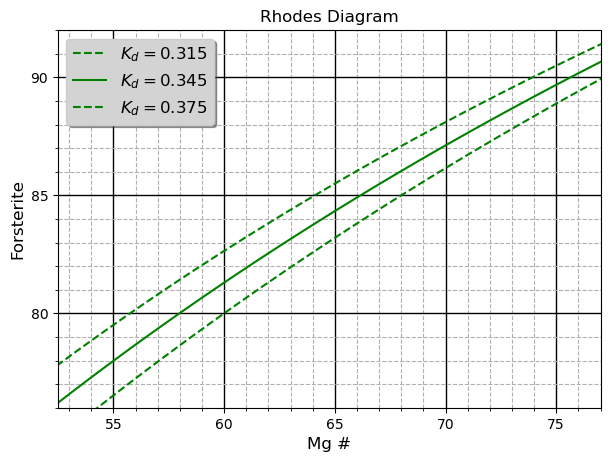

In [175]:
plot_rhodes()

### Get a working framework for plotting data using the Ms Dataset

#### Plot Rhodes diagram using the distance from Kilauea as a color parameter (something funny is happening in the legend here)

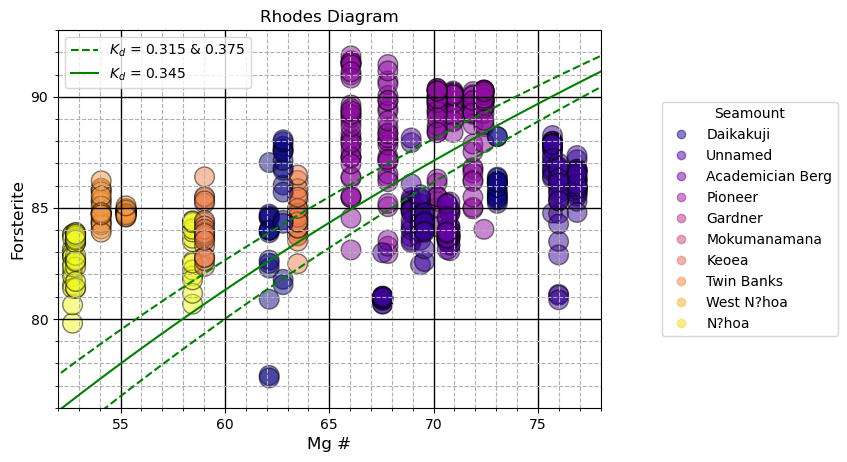

In [128]:
fig, ax = plt.subplots()

#Kd = 0.315
ax.set_ylabel("Forsterite", fontsize=12)
ax.set_xlabel("Mg #", fontsize=12)
ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

#Kd = 0.345
ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

#Kd = 0.375
ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

#Plot data with colors representing the distance from Kilauea
data = ax.scatter(
    rhodes_data_df['Whole Mg#'], 
    rhodes_data_df['Forsterite'], 
    s=200, c=rhodes_data_df['Distance'], 
    cmap='plasma',
    alpha=0.5, 
    edgecolors='k' 
    
)

#Adjust axis properties

ax.set_xlim(52, 78)
ax.set_ylim(76, 93)
ax.set_title('Rhodes Diagram')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# #Legend properties
# legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('lightgrey')

kd_1_3_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.315 & 0.375', linestyle='--')
kd_2_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.345', linestyle='-')

ax.legend(handles=[kd_1_3_line, kd_2_line])
first_legend = ax.legend(handles=[kd_1_3_line, kd_2_line], loc='upper left')

plt.gca().add_artist(first_legend)
ax.legend(
    handles=data.legend_elements()[0], 
    labels=seamounts,
    title="Seamount",
    bbox_to_anchor=[1.45, 0.5], 
    loc='center right'
)


#Grid lines
ax.grid(True, which='major', color='k', linestyle='-', linewidth=1)
ax.grid(True, which='minor', linestyle = '--')
fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()

#### Use the Seamount Names as a categorical parameter to color the symbols

In [173]:
#Assign colors to seamounts
colors = [
    'red', 
    'lightcoral', 
    'darkred', 
    'seashell',
    'darkorange',
    'olivedrab',
    'lawngreen',
    'turquoise',
    'blue',
    'indigo',
    'magenta'
]
# using zip() function to create a dictionary
# with keys and same length None value 
color_dict = dict(zip(seamounts, colors))
  
# print dict
print(color_dict)

{'Daikakuji': 'red', 'Unnamed': 'lightcoral', 'Academician Berg': 'darkred', 'Pioneer': 'seashell', 'Gardner': 'darkorange', 'Mokumanamana': 'olivedrab', 'Keoea': 'lawngreen', 'Twin Banks': 'turquoise', 'West Nihoa': 'blue', 'Nihoa': 'indigo', 'Kauai': 'magenta'}


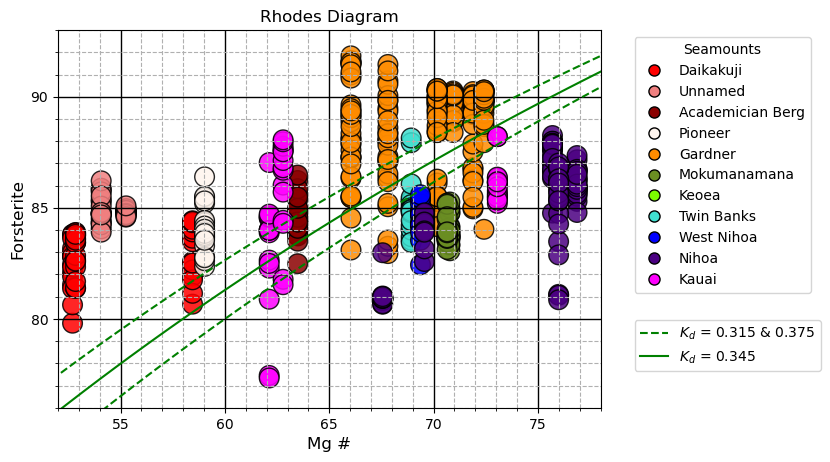

In [174]:
fig, ax = plt.subplots()

#Set axis labels
ax.set_ylabel("Forsterite", fontsize=12)
ax.set_xlabel("Mg #", fontsize=12)

#Kd = 0.315
kd1 = ax.plot(Mg_NUM_liq_1, Mg_Num_Ol, "green", label='$K_{d} = 0.315$', linestyle='--')

#Kd = 0.345
kd2 = ax.plot(Mg_NUM_liq_2, Mg_Num_Ol, "green", label='$K_{d} = 0.345$')

#Kd = 0.375
kd3 = ax.plot(Mg_NUM_liq_3, Mg_Num_Ol, "green", label='$K_{d} = 0.375$', linestyle='--')

#Plot data with colors representing the distance from Kilauea
data = ax.scatter(
    rhodes_data_df['Whole Mg#'], 
    rhodes_data_df['Forsterite'], 
    s=200, 
    c=rhodes_data_df['Seamount'].map(color_dict), 
    alpha=0.85, 
    edgecolors='k' 
    
)

#Adjust axis properties

ax.set_xlim(52, 78)
ax.set_ylim(76, 93)
ax.set_title('Rhodes Diagram')


ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_minor_locator(MultipleLocator(1))

#Grid lines
ax.grid(True, which='major', color='k', linestyle='-', linewidth=1)
ax.grid(True, which='minor', linestyle = '--')

#Legend properties
# legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
# # Put a nicer background color on the legend.
# legend.get_frame().set_facecolor('lightgrey')

kd_1_3_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.315 & 0.375', linestyle='--')
kd_2_line = mlines.Line2D([], [], color='green', label='$K_{d}$ = 0.345', linestyle='-')

legend = ax.legend(handles=[kd_1_3_line, kd_2_line])
first_legend = ax.legend(
    handles=[kd_1_3_line, kd_2_line], 
    facecolor = 'white', 
    loc='upper left',  
    bbox_to_anchor=(1.05, 0.25) )

plt.gca().add_artist(first_legend)

handles = [mlines.Line2D([0], [0], marker='o', color='w', 
                  markerfacecolor=v, label=k, markersize=8, markeredgecolor='k') for k, v in color_dict.items()]

ax.legend(title='Seamounts', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()

### Bring in the new data to decide what needs to be done